In [18]:
# load dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

In [2]:
# read in data
raw_data = pd.read_csv("data.csv")

In [3]:
# data inspection
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# remove NaN column
raw_data = raw_data.iloc[:,:-1]

In [5]:
# check data
raw_data.shape

(569, 32)

/Users/congchen/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


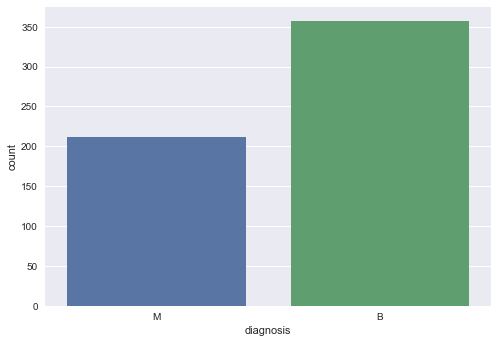

In [8]:
# plot diagnosis
sns.countplot(raw_data['diagnosis'],label="Count")
plt.show()

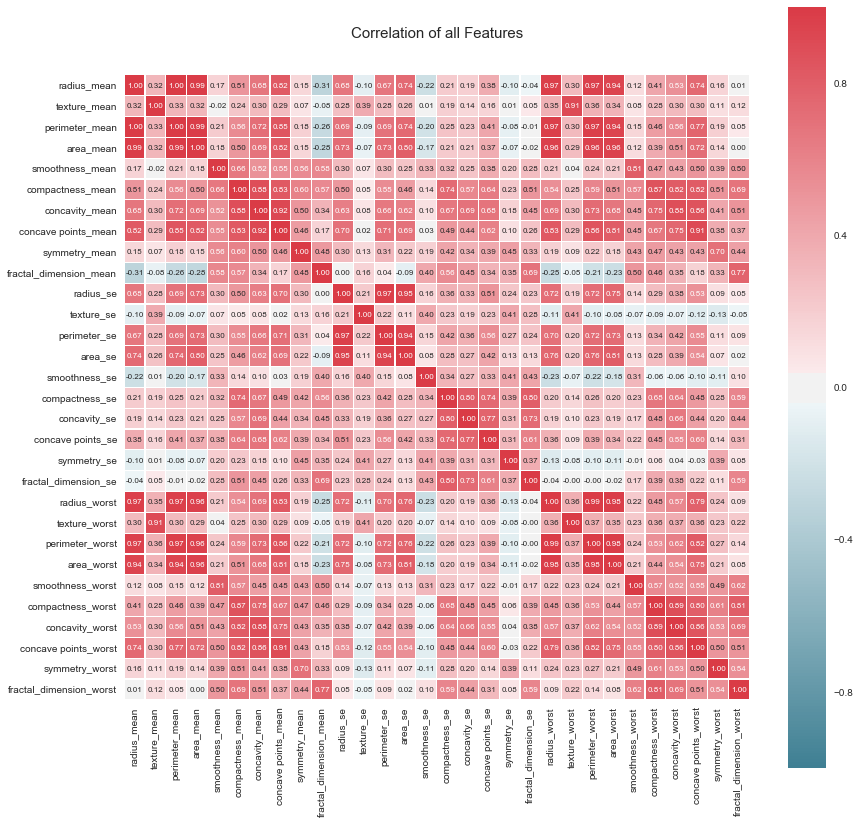

In [9]:
# check correlation of features and plot
corr = raw_data.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of all Features', y=1.05, size=15)
plt.show()

In [10]:
# change 'diagnosis' column values to 1 or 0
raw_data['diagnosis'] = raw_data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

In [11]:
# change 'id' column to index
raw_data = raw_data.set_index('id')

In [13]:
# inspect the final data frame
# raw_data.head()
raw_data.shape

(569, 31)

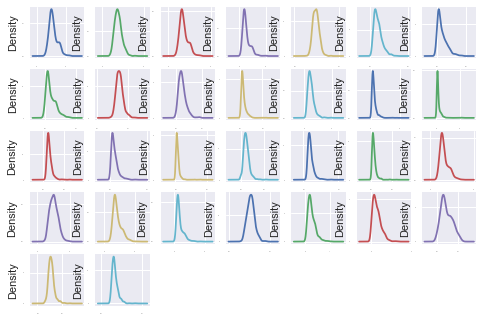

In [14]:
# generate density plot for features
raw_data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

In [16]:
# assign X, y data set and split to training and testing data sets
y = raw_data['diagnosis'].values
X = raw_data.drop('diagnosis', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [19]:
# generate model list to be tested
models_list = []
models_list.append(('DT', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('RF', RandomForestClassifier()))

In [20]:
# evaluate models performance
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

DT: 0.909615 (0.037270) (run time: 0.061523)
SVM: 0.625769 (0.074918) (run time: 0.085717)
NB: 0.937115 (0.025816) (run time: 0.013100)
KNN: 0.901859 (0.044437) (run time: 0.022216)
RF: 0.949615 (0.019870) (run time: 0.154993)


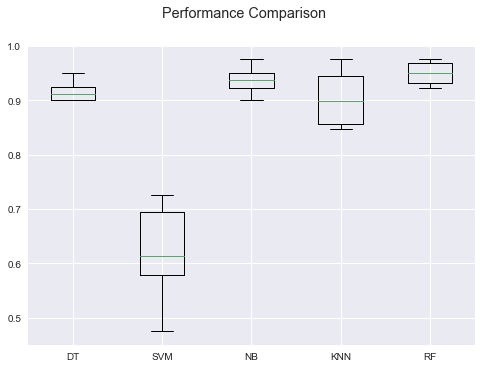

In [21]:
# plot the results
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
# using Pipeline and evaluate models again using scaled data

import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', 
                                                                       RandomForestClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledDT: 0.927244 (0.028195) (run time: 0.063515)
ScaledSVM: 0.969808 (0.018832) (run time: 0.042754)
ScaledNB: 0.929615 (0.024717) (run time: 0.017775)
ScaledKNN: 0.962179 (0.025967) (run time: 0.026183)
ScaledRF: 0.959679 (0.023269) (run time: 0.156581)


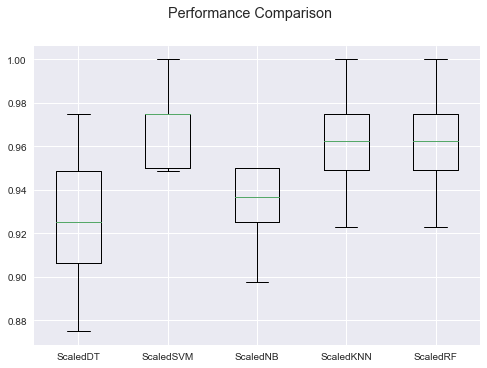

In [24]:
# plot the results
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()